## Gradient Descent:
$$
\begin{array}{l}
J(W) =  \sum_{i=1}^{m}((y^{(i)} - w_0 - w_1 x^{(i)}))^2
\end{array}
$$
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.
Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

### Implementing GD for linear regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

In [3]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

In [4]:
# SSE cost function
def cost_function(X, y, w):
    return np.sum((h_w(X, w)- y) ** 2) /  len(X)

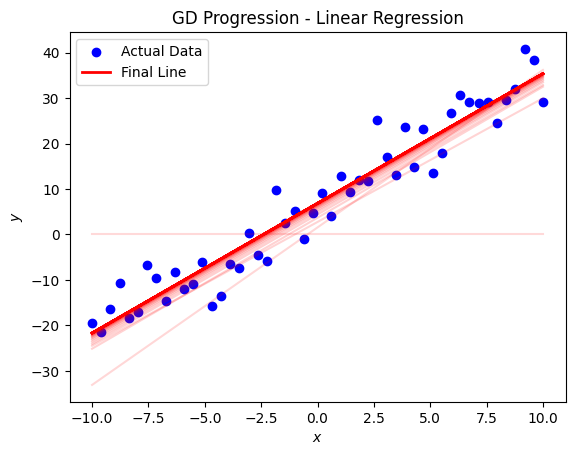

In [8]:
# Gradient descent
def gradient_descent(X, y, w, alpha, num_iters):
    m = len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X, w) - y) / m
        gradient_w1 = np.sum((h_w(X, w) - y) * X) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X, y, w))
        w_history.append(w.copy()) # Store a copy of w, not the reference
    
    return w, cost_history, w_history

X, y = generate_data(n=50, noise=5.0)
w_initial = [0,0] # Start with w0 = 0, w1 = 0
eta = 0.05 # Learning rate
num_iters = 500

# Run gradient Descent
w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)

# Visualize cost function (log of J(w))
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i],w1_vals[i]]
        J_vals[i,j] = cost_function(X, y, w)

# Plot GD progression (without labels for lines, different alphas)
plt.scatter(X, y, color = 'blue', label='Actual Data')
# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100 # Gradually increase alpha for each line
    plt.plot(X, h_w(X, w), color='red', alpha=alpha)
# Final line in bold
plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()